In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.io import imread
from skimage.transform import rotate, resize

In [11]:
filter_img = imread('Filters-Round-1/RGB_0.1mm_1a.tif')
film_img = imread('Fruit-Bowl/Rhine_1_RGB_0.1.png')
filter_img = np.uint8(filter_img >> 8)

<tifffile.TiffPages @252150920> invalid offset to first page 252150920
<tifffile.TiffPages @252150920> invalid offset to first page 252150920


IndexError: Index out of range while reading from tiff file

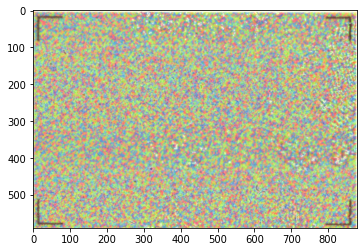

In [9]:
plt.imshow(filter_img)

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(film_img/255**2)

In [ ]:
rot_film_img = rotate(film_img, 89, mode='wrap')
crop_film_img = rot_film_img[500:5250,400:7500,:]

plt.figure(figsize=(6,6))
plt.imshow(crop_film_img)

In [ ]:
plt.imshow(filter_img)

In [ ]:
resize_film_img = resize(crop_film_img, output_shape=filter_img.shape)

In [ ]:
filterR = filter_img[:,:,0]
filterG = filter_img[:,:,1]
filterB = filter_img[:,:,2]

film = rgb2gray(resize_film_img)

fig, axs = plt.subplots(2,3, figsize=(10, 5))
axs[0,0].imshow(filterR, cmap='Greys')
axs[0,1].imshow(filterG, cmap='Greys')
axs[0,2].imshow(filterB, cmap='Greys')
axs[1,0].imshow(film, cmap='Greys')
axs[1,1].imshow(film, cmap='Greys')
axs[1,2].imshow(film, cmap='Greys')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(10, 5))
R = filterR * film
G = filterG * film
B = filterB * film
axs[0].imshow(R, cmap='Greys')
axs[1].imshow(G, cmap='Greys')
axs[2].imshow(B, cmap='Greys')
plt.show()

In [ ]:
R_new = np.expand_dims(R, 2)
G_new = np.expand_dims(G, 2)
B_new = np.expand_dims(B, 2)
temp = np.append(R_new, G_new, axis=2)
reconst_img = np.append(temp, B_new, axis=2)

In [ ]:
plt.imshow(reconst_img/255)

In [ ]:
v, u = optical_flow_ilk(filterR, film)
nr, nc = film.shape
row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
warp_film = warp(film, np.array([row_coords + v, col_coords + u]), mode='edge')

In [ ]:
plt.imshow(filterR, cmap='Greys')

In [ ]:
plt.imshow(film, cmap='Greys')

In [ ]:
plt.imshow(warp_film, cmap='Greys')